In [9]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [10]:
house = pd.read_csv('./datasets/train_new.csv')
house_test=pd.read_csv('./datasets/test.csv')

C:\Users\wongh\AppData\Local\Temp\ipykernel_14940\972705289.py:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test=pd.read_csv('./datasets/test.csv')


In [12]:
# Creating dist_from_city column in test set
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])

    # Compute the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Raffles Place coordinates
raffles_place_latitude, raffles_place_longitude = 1.2833, 103.8501

# Calculate the distance between each location and Raffles Place
df_test['dist_from_city'] = haversine_distance(df_test['Latitude'], df_test['Longitude'],
                                                       raffles_place_latitude, raffles_place_longitude)

In [13]:
# Creating age_at_tranc column in test set
df_test['age_at_tranc']=df_test['Tranc_Year']-df_test['lease_commence_date']

In [14]:
X=house.drop('resale_price',axis=1)
y = df['resale_price']

In [15]:
# Creating the numerical and categorical columns
cat_cols = [cname for cname in X.columns if X[cname].dtype == 'object']
num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [16]:
# Split the data using train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Ridge Regression

In [30]:
# set up the column transformer to apply OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_cols), ('num', StandardScaler(), num_cols)
        ])
    
# set up the pipeline for Ridge Regression
pipeline_ridge = Pipeline([
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=1.059560179277616))])

In [31]:
# Checking the Ridge Regression r2 scores
pipeline_ridge_scores = cross_val_score(pipeline_lr, X, y, cv=10)

print (pipeline_ridge_scores)
print (np.mean(pipeline_ridge_scores))

[0.86700985 0.87012334 0.87099365 0.86940911 0.86849034 0.87001746
 0.8693915  0.86765748 0.86669726 0.87030383]
0.8690093819939163


In [32]:
# Fit the model with training data
pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['town', 'flat_type',
                                                   'flat_model']),
                                                 ('num', StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'Tranc_Year', 'mid',
                                                   'mrt_nearest_distance',
                                                   'age_at_tranc'])])),
                ('model', Ridge(alpha=1.059560179277616))])

In [33]:
print(f"The train score is: {round(pipeline_ridge.score(X_train, y_train), 6)}")
print(f"The test score is: {round(pipeline_ridge.score(X_test, y_test), 6)}")

The train score is: 0.869795
The test score is: 0.866609


The R2 scores for both train and test sets are similar, implying the model is performing well and not overfitting or underfitting the data. but the scores is slightly lower than that of Linear Regression.

In [34]:
# Obtaining the features and its corresponding coef
coef=pipeline_ridge.named_steps['model'].coef_
features=pipeline_ridge[:-1].get_feature_names_out()

In [35]:
df_coef=pd.DataFrame({'Features':features,'Coefficients':coef})
df_coef.head(62)

,Features,Coefficients
0,cat__town_ANG MO KIO,23896.447785
1,cat__town_BEDOK,-156.463875
2,cat__town_BISHAN,111113.055656
3,cat__town_BUKIT BATOK,-59453.347827
4,cat__town_BUKIT MERAH,112818.025424
5,cat__town_BUKIT PANJANG,-93180.362190
6,cat__town_BUKIT TIMAH,188079.777322
7,cat__town_CENTRAL AREA,91611.034815
8,cat__town_CHOA CHU KANG,-140838.977718
9,cat__town_CLEMENTI,58071.974654


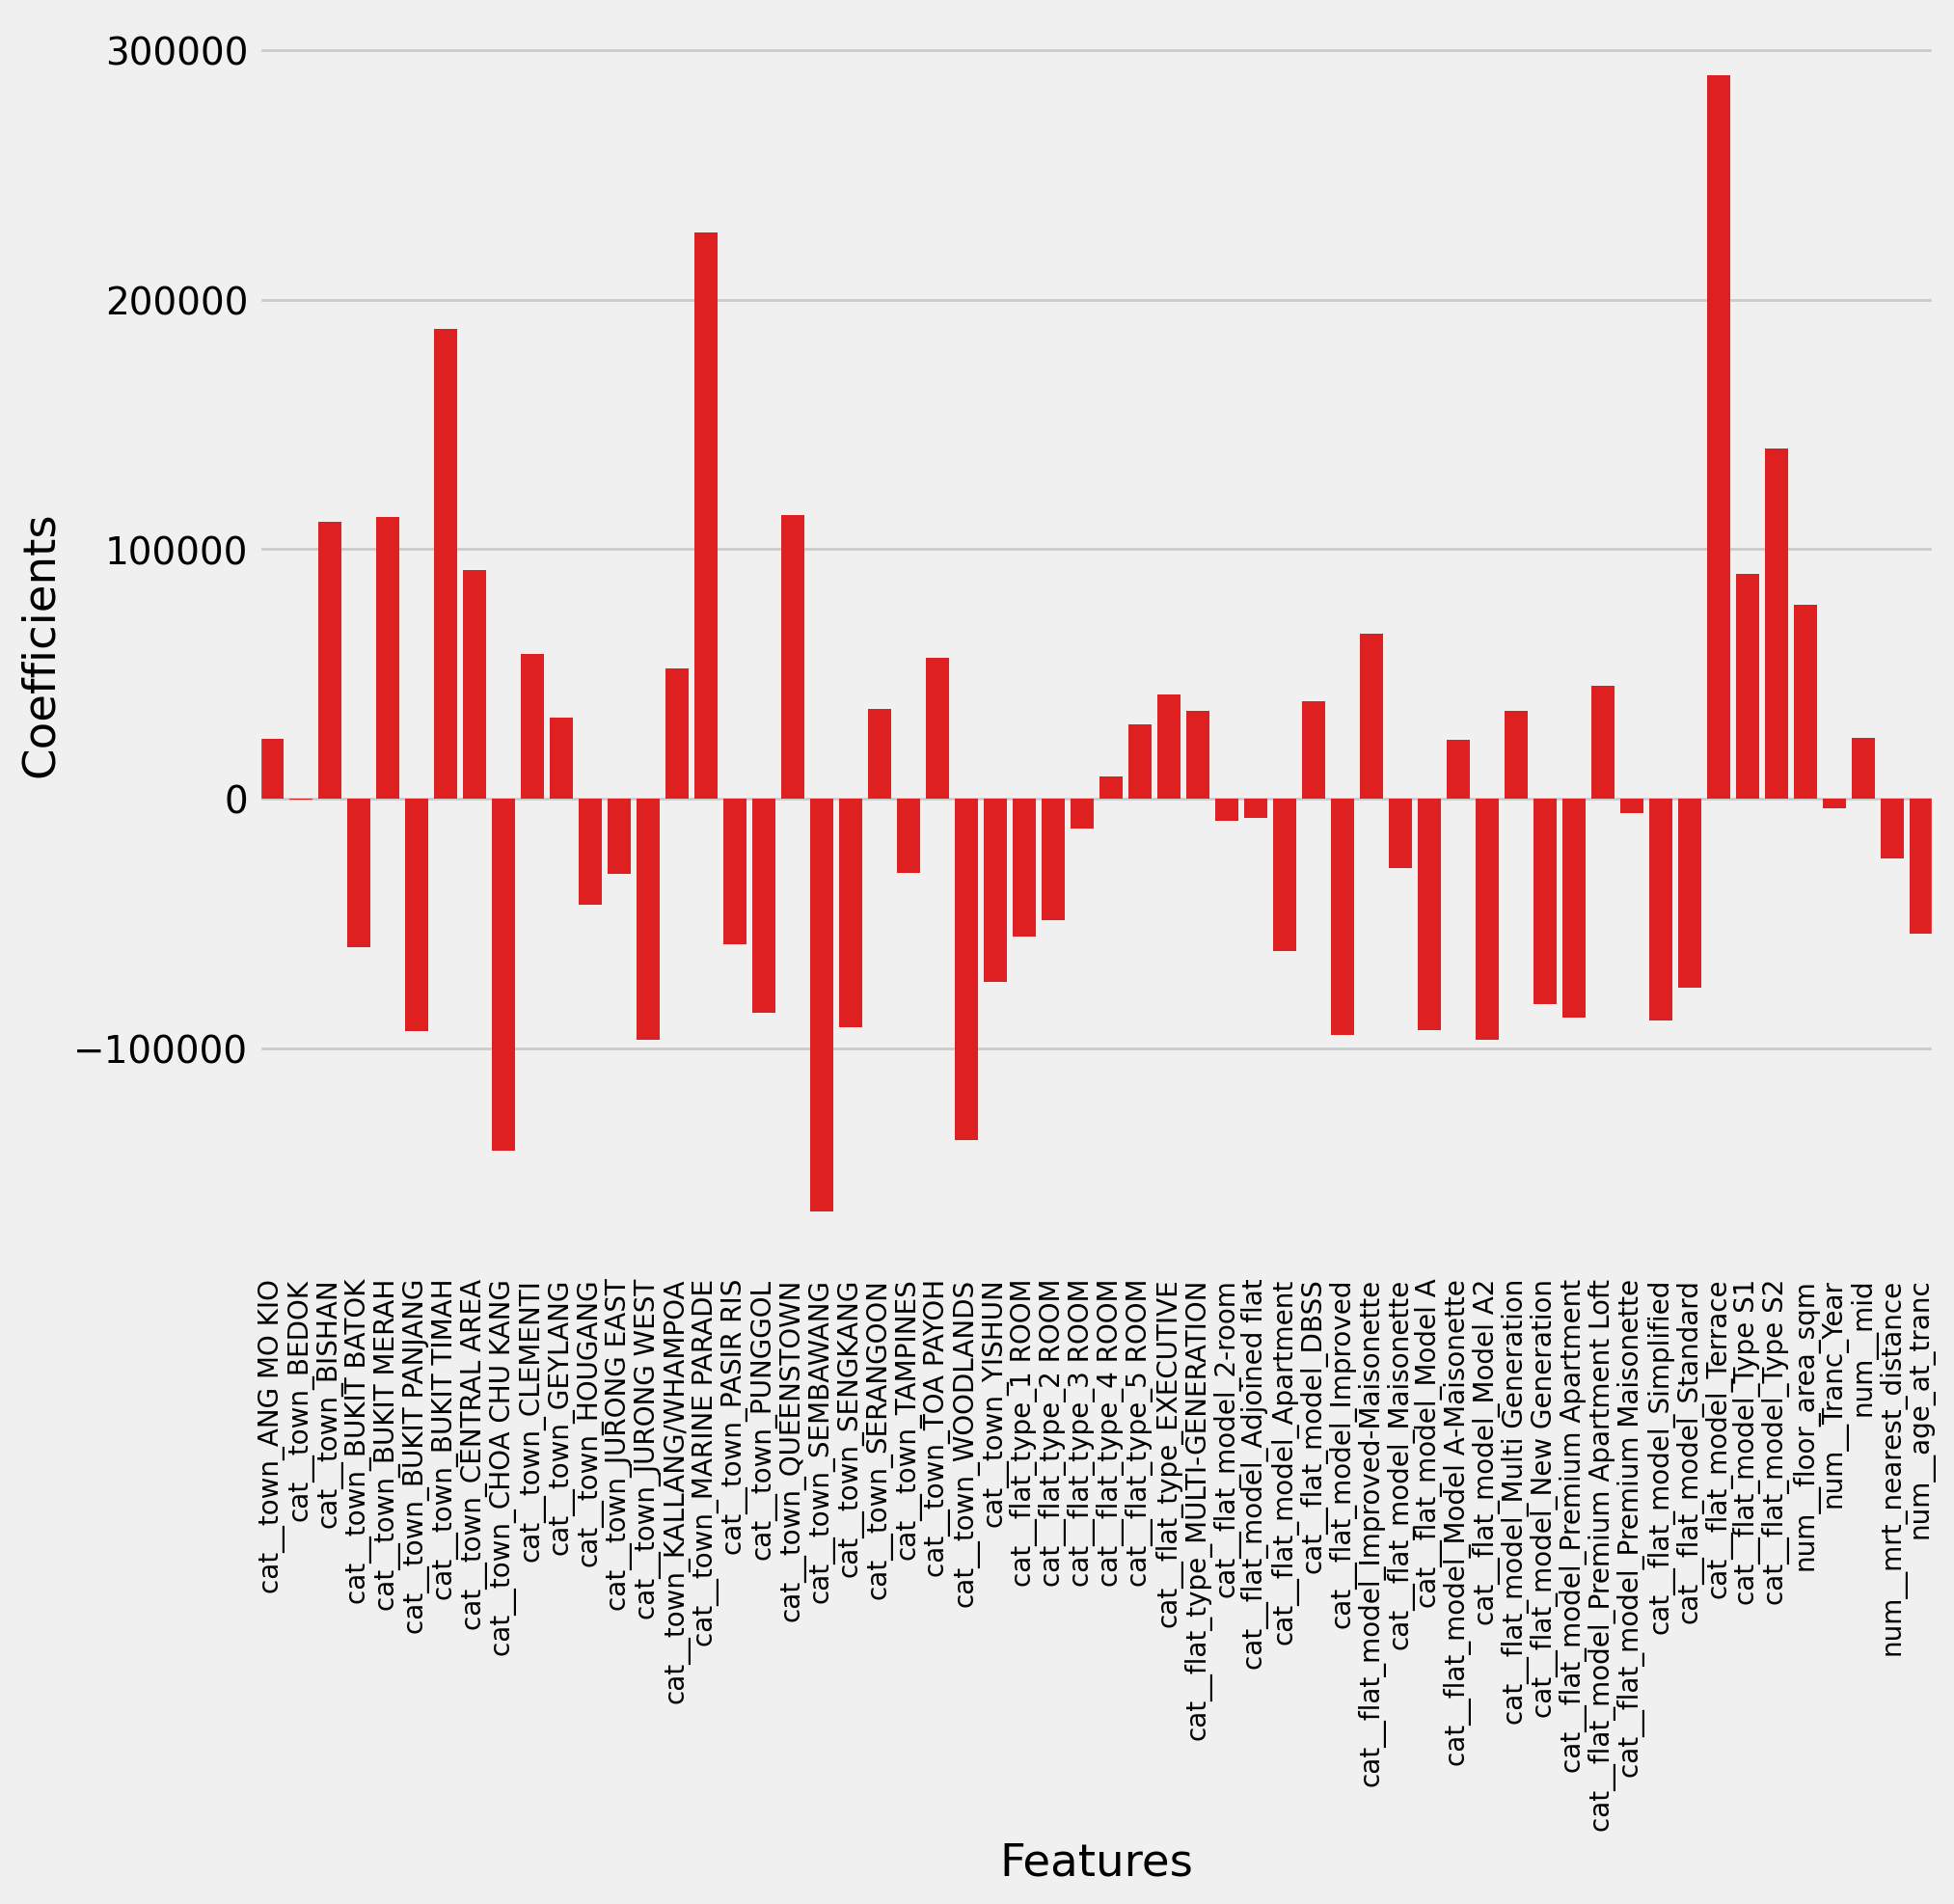

In [36]:
plt.figure(figsize=(10,8))
# create a bar chart
sns.barplot(data=df_coef, x='Features', y='Coefficients', color='red')
plt.xticks(rotation=90, fontsize=10)
# save the chart as a PNG file
plt.savefig('./datasets/CoeffcientsRidge.png')

From the above Ridge coefficients barplpot, the coefficients for town and flat model are still quite wildly overblown compared to the other features. 

In [37]:
# Setting the predicted value for X_test
y_pred=pipeline_ridge.predict(X_test)

# Get MSE, RMSE, MAE R^2 scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
score = pipeline_ridge.score(X_test, y_test)
    
# Print the scores
print("R^2:", score, "\n")
print("MSE: ", mse, "\n")
print("RMSE: ", rmse, "\n")
print("MAE: ", mae, "\n")


R^2: 0.8666087446547701 

MSE:  2712585562.2307835 

RMSE:  52082.48805722307 

MAE:  39925.92320841769 



The MSE, RMSE and MAE are still high, slightly than that of Linear Regression model. The r2 score is similar to that of Linear Regression model.

In [38]:
compareRidge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Apply Function to round off to nearest 1000
def round_to_nearest_thousands(x):
    return round(x / 1000) * 1000

compareRidge['Predicted'] = compareRidge['Predicted'].apply(lambda x:round_to_nearest_thousands(x))

# Get Dataframe to show the price diff between Actual and Predicted
compareRidge['Price Diff'] = compareRidge['Predicted'] - compare['Actual']
compareRidge['Price Diff Percent'] = (compareRidge['Predicted'] - compareRidge['Actual']) / compare['Actual'] *100
compareRidge.head()

,Actual,Predicted,Price Diff,Price Diff Percent
42982,355000.0,359000,4000.0,1.126761
108277,472000.0,576000,104000.0,22.033898
50201,625000.0,527000,-98000.0,-15.680000
45216,675000.0,542000,-133000.0,-19.703704
17365,465000.0,497000,32000.0,6.881720


In [39]:
# Checking how many price difference percentage less than or equal 10%
compareRidge.loc[(compareRidge['Price Diff Percent']<=10.0)&(compareRidge['Price Diff Percent']>=-10)].value_counts().sum()

18944

The model is able to predict 63% of the train set that is within 10% price difference of the actual HDB housing resale price.

### Test Predictions (Ridge Regression)

In [40]:
# Initialize an empty dictionary to store the submission_ridge data
data = {'Id':[],'Predicted':[]}

# Loop through a range of ids
for id in list(df_test['id']):
    
    # Calculate the predicted price based on the id 
    # Get the sample data for the given id
    sample_data = df_test[df_test['id'] == id]
    
    # Drop the ID  as they are not required for prediction
    sample_data_pred = sample_data.drop(['id'], axis=1)
    
    # Predict the resale price using the pipeline
    predicted_price = pipeline_ridge.predict(sample_data_pred)
        
    # Append the id and predicted price to the data list
    data['Id'].append(id)
    data['Predicted'].append(predicted_price[0])

In [41]:
sub_regR=pd.DataFrame(data)

In [162]:
sub_regR.head()

,Id,Predicted
0,114982,369763.295883
1,95653,526324.172390
2,40303,363134.943813
3,109506,237668.813465
4,100149,430512.247186


In [43]:
sub_regR.to_csv('./datasets/submission_ridge.csv',index=False)

In [177]:
sub_regL.to_csv('./datasets/submission_lasso.csv')

#### Insights

The town, flat model and the floor levels are the features that add most on the HDB housing resale prices.

The age of the flat hurts the most on HDB housing resale prices.

Homeowners can renovate their homes or maintain their water pipes , floor tiles and walls to make it more appealing to the new home buyers.

Central Area, Bukit Merah, Queenstown, Bukit Timah, Toa Payoh and Kallang/Whampoa are towns that make for good investments.

This model might not generalize well to other cities. This is due to the fact that Singapore is a small island city and well connected with public transports such as MRT. Whereas for bigger cities elsewhere, public transport will be the last of their concerns, as they need to have their own private vehicle to move around.

Price in 2022 and 2012 may not be the exact real match due to inflation. Therefore, CPI (Consumer Price Index) should be included in the data to reflect real price of flats sold 10 years ago

I feel that their daily commute to and fro from their workplace would be an important feature.
